In [1]:
import struct
import numpy as np

def read_idx(filename):
    with open(filename, 'rb') as f:
        zero, data_type, dims = struct.unpack('>HBB', f.read(4))
        shape = tuple(struct.unpack('>I', f.read(4))[0] for _ in range(dims))
        data = np.frombuffer(f.read(), dtype=np.uint8).reshape(shape)
        return data

In [3]:
X = read_idx("mnist/train-images-idx3-ubyte")
X = X.reshape(X.shape[0], -1)

In [4]:
X.shape

(60000, 784)

In [ ]:
# step 1: center the data
mean = np.mean(X, axis=0)
X_centered = X - mean

In [8]:
# step 2: compute the covariance matrix
covariance_matrix = np.dot(X_centered.T, X_centered) / (X_centered.shape[0] - 1)
print("Covariance matrix shape:", covariance_matrix.shape)

Covariance matrix shape: (784, 784)


In [9]:
eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

In [11]:
k = 50
idx = np.argsort(eigenvalues)[::-1]
eigvectors = eigenvectors[:, idx]
eigenvalues = eigenvalues[idx]

principal_components = eigvectors[:, :k]
print("Principal components shape:", principal_components.shape)

Principal components shape: (784, 50)


In [12]:
X_reduced = np.dot(X_centered, principal_components)

In [13]:
X_reduced.shape

(60000, 50)

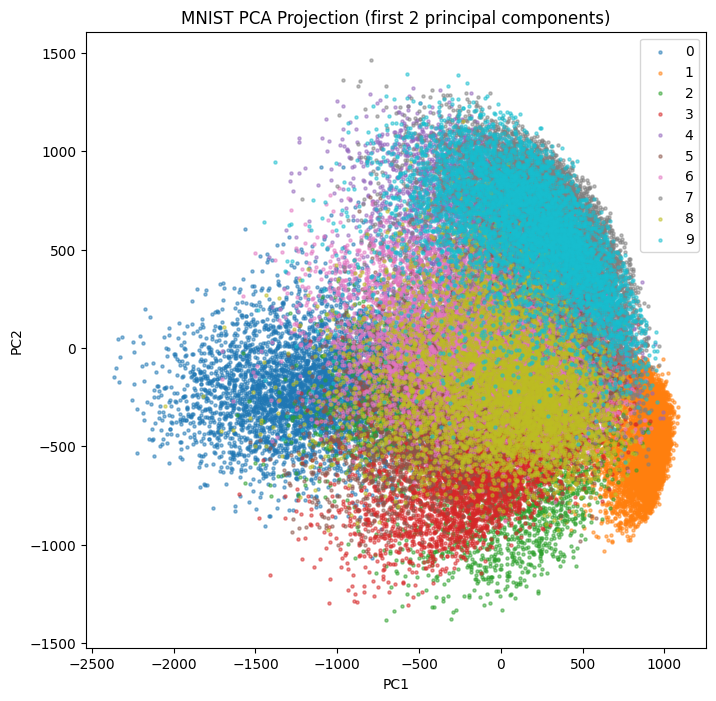

In [14]:
import matplotlib.pyplot as plt

y = read_idx('mnist/train-labels-idx1-ubyte')  # shape: (60000,)

plt.figure(figsize=(8, 8))
for digit in range(10):
    mask = y == digit
    plt.scatter(X_reduced[mask, 0], X_reduced[mask, 1], s=5, label=str(digit), alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('MNIST PCA Projection (first 2 principal components)')
plt.legend()
plt.show()

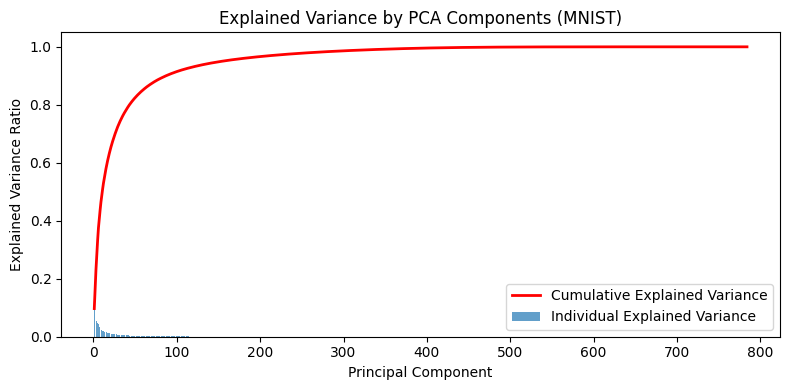

Cumulative explained variance for first 2 PCs: 0.1680
Cumulative explained variance for first 10 PCs: 0.4881
Cumulative explained variance for first 20 PCs: 0.6436
Cumulative explained variance for first 50 PCs: 0.8246
Cumulative explained variance for first 100 PCs: 0.9146
Cumulative explained variance for first 200 PCs: 0.9664


In [19]:
# eigvals: (784,) sorted in descending order
explained_variance = eigenvalues / np.sum(eigenvalues)  # each entry is the % variance explained by that component
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(8, 4))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, label='Individual Explained Variance')
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, color='red', lw=2, label='Cumulative Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by PCA Components (MNIST)')
plt.legend()
plt.tight_layout()
plt.show()

# Print cumulative explained variance for first k components
for i in [2, 10, 20, 50, 100, 200]:
    print(f"Cumulative explained variance for first {i} PCs: {cumulative_variance[i-1]:.4f}")
